# Bar Charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'viridis',
                   title: str = None, horizontal: bool = False, show_mean_median: bool = False) -> None:
    """
    Generate a bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, the chart will be displayed as a horizontal bar chart.
                                     Default is False (vertical bar chart).
        show_mean_median (bool, optional): If True, the mean and median values will be displayed in the top-right
                                           corner of the chart with a frame. Default is False.

    Returns:
        None: The function displays the bar chart directly without returning anything.

    Example:
        # Example DataFrame
        data = {
            'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
            'Values': [25, 40, 15, 30]
        }

        df = pd.DataFrame(data)

        # Using the function to create a vertical bar chart without mean and median
        plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma', title='Vertical Bar Chart')

        # Using the function to create a vertical bar chart with mean and median displayed
        plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma',
                       title='Vertical Bar Chart with Mean and Median', show_mean_median=True)

        # Using the function to create a horizontal bar chart without mean and median
        plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma', title='Horizontal Bar Chart', horizontal=True)

        # Using the function to create a horizontal bar chart with mean and median displayed
        plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma',
                       title='Horizontal Bar Chart with Mean and Median', horizontal=True, show_mean_median=True)
    """

    # Step 1: Sort the DataFrame by the y_column in descending order
    df = dataframe.sort_values(by=y_column, ascending=False)

    # Set the Seaborn style
    sns.set(style="white")

    # Create the bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    if horizontal:
        sns.barplot(x=y_column, y=x_column, data=df, palette=colormap, ci=None)
    else:
        sns.barplot(x=x_column, y=y_column, data=df, palette=colormap, ci=None)

    # Display mean and median values if show_mean_median is True
    if show_mean_median:
        # Calculating mean and median
        mean_value = df[y_column].mean()
        median_value = df[y_column].median()

        # Adding mean and median values in the top-right corner of the chart with a frame
        text_to_display = f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}'
        plt.text(0.95, 0.95, text_to_display, transform=plt.gca().transAxes,
                 ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Adding labels and title with bold and bigger title
    if horizontal:
        plt.xlabel(y_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(x_column, labelpad=15, color='#333333', fontsize=14)
    else:
        plt.xlabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(y_column, labelpad=15, color='#333333', fontsize=14)

    if title:
        plt.title(title, fontweight='bold', fontsize=18, pad=15, color='#333333')

    # Remove horizontal lines (grid) and borders (spines)
    sns.despine(left=True, bottom=True)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()


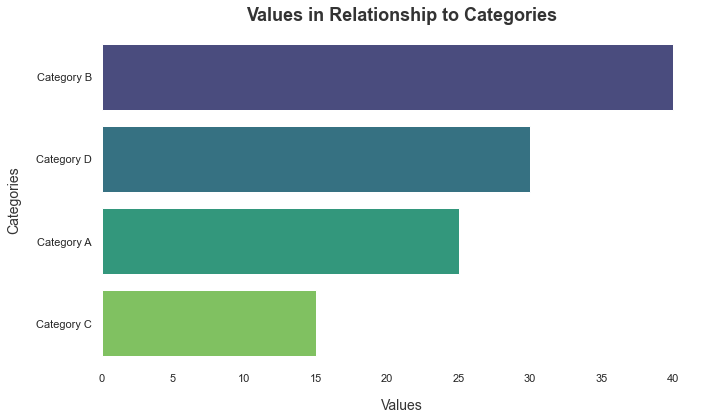

In [21]:
plot_bar_chart(df, 'Categories', 'Values', title= 'Values in Relationship to Categories', horizontal=True)